### In this notebook, we're working with the MNIST dataset, a collection of 70,000 grayscale images of handwritten digits (0-9).
### The MNIST dataset is a standard benchmark in machine learning and serves as an excellent introduction to image classification tasks.

**Each image is 28x28 pixels, represented as a 2D array. We'll:**
1. Load the dataset (split into 60,000 training and 10,000 test images)
2. Normalize pixel values from [0-255] to [0-1]
3. Build a simple neural network using TensorFlow/Keras
4. Train the model to recognize handwritten digits
5. Evaluate the model and visualize predictions
---

- Importing the necessary libraries for working with TensorFlow, a popular machine learning framework. Here is a breakdown of what each import statement does:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


- Loading the MNIST dataset using the `load_data()` function from the `keras.datasets.mnist` module.
- It assigns the training images to `x_train`, training labels to `y_train`, testing images to `x_test`, and testing labels to `y_test`.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the training and testing split ratio
split_ratio = 0.8  # 80% training, 20% testing
train_size = int(len(x_train) * split_ratio)

# Split the dataset
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

- Defining a simple neural network model using the Keras library.

In [ ]:
# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)), # Input layer with shape (28, 28)
    keras.layers.Flatten(),             # Flatten the 28x28 images to a 1D vector
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (digits 0-9) and softmax activation
])


## Understanding Model Compilation in Simple Terms
When you're creating a neural network, "compiling" is like setting up the rules for how your model will learn. It's similar to preparing for a exam:

### The Three Key Parts:
1. **Optimizer (Adam):**<br>
This is like your study strategy. The optimizer (in this case "Adam") decides how to adjust your model when it makes mistakes. Think of it as:
- A smart tutor that helps you improve step by step
- It decides how big or small changes should be
- Adam is popular because it adapts as it goes - like a tutor who adjusts teaching methods based on what's working

2. **Loss Function (Sparse Categorical Crossentropy):**<br>
This is the test itself - how we measure mistakes. The *sparse categorical crossentropy* is:
- A way to score how badly your model messed up when predicting categories (like digits 0-9)
- The word "sparse" just means the correct answers are single numbers, not lists
- Lower score = better performance

3. **Metrics (Accuracy):**<br>
This is like your grade report - how we track progress. "Accuracy" simply means:
- The percentage of examples the model got right.
- Easy to understand: 90% accuracy means 9 out of 10 predictions were correct.

### In Everyday Terms:
When you compile a model, you're just saying:<br>
1. "Here's how I want you to learn" (optimizer)
2. "Here's how I'll measure your mistakes" (loss function)
3. "Here's what score I care about seeing" (metrics)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- `model.fit(x_train, y_train, epochs=5)` is training the model using the training data `x_train` and corresponding labels `y_train` for 5 epochs.
- During each epoch, the model will iterate over the training data multiple times, adjusting its weights to minimize the loss function and improve its performance on the training data.

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8658 - loss: 0.4696
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9619 - loss: 0.1325
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9747 - loss: 0.0858
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0635
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0471


- This code snippet is evaluating the trained model on the test set data.
- It calculates the loss and accuracy of the model's predictions on the test set. The `model.evaluate(x_test, y_test)` function computes the loss and any specified metrics for the test set.
- The resulting test loss and test accuracy are then printed out using `print(f'\nTest accuracy: {test_acc:.4f}')`.
- This step helps to assess how well the model generalizes to unseen data and provides insights into its performance.


In [ ]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0945

Test accuracy: 0.9733


- Making predictions using a machine learning model (`model`) on the test data (`x_test`). It then displays a sample image from the test data (at index 7) along with the predicted label for that image.
- The predicted label is obtained by finding the index of the highest probability in the predictions array for that image.
- Finally, it shows the image and its predicted label using matplotlib's `imshow` and `title` functions.


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


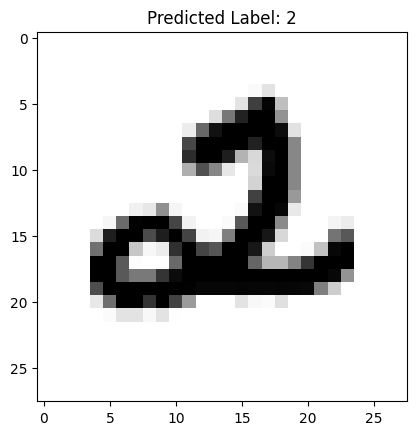

In [ ]:
# Predict using the model
predictions = model.predict(x_test)

# Display a sample image and its prediction
plt.imshow(x_test[9], cmap=plt.cm.binary)
plt.title(f'Predicted Label: {np.argmax(predictions[9])}')
plt.show()


In [ ]:
# Display weights and biases for each Dense layer
for layer in model.layers:
    if isinstance(layer, keras.layers.Dense):  # Only check Dense layers
        weights, biases = layer.get_weights()
        print(f'Layer: {layer.name}')
        print(f'Weight shape: {weights.shape}')
        print(f'Bias shape: {biases.shape}')
        print(f'First few weights: {weights.flatten()[:5]}')  # Print some weights
        print(f'First few biases: {biases[:5]}\n')  # Print some biases


Layer: dense
Weight shape: (784, 128)
Bias shape: (128,)
First few weights: [-0.07052038 -0.07771616 -0.01744411  0.07634378 -0.0429487 ]
First few biases: [-2.8326606e-02  1.5086271e-01  2.1045977e-02 -4.8609160e-02
 -7.4127165e-05]

Layer: dense_1
Weight shape: (128, 10)
Bias shape: (10,)
First few weights: [ 0.09093396  0.14004122 -0.01935348 -0.2832253   0.21875705]
First few biases: [-0.09293234 -0.03846778 -0.02291208  0.00240456 -0.02835173]

